In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Flatten
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/brain_tumor_dataset"

In [5]:
os.listdir(path)

['no', 'yes']

In [6]:
len(os.listdir(path + "/no"))

98

In [7]:
len(os.listdir(path + "/yes"))

155

In [8]:
os.listdir(path + "/no")[:3]

['10 no.jpg', '11 no.jpg', '1 no.jpeg']

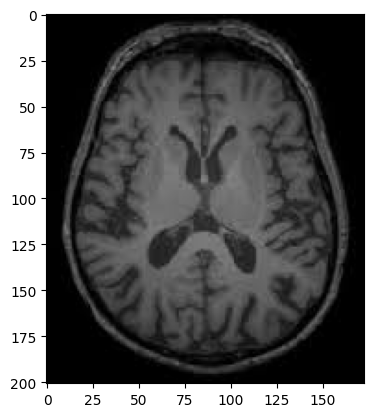

In [9]:
plt.imshow(plt.imread(path + "/no" + "/10 no.jpg"))

In [10]:
os.listdir(path + "/yes")[:3]

['Y20.jpg', 'Y243.JPG', 'Y22.jpg']

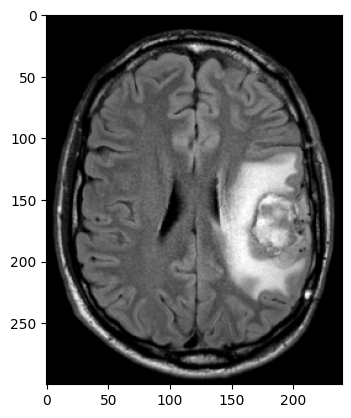

In [11]:
plt.imshow(plt.imread(path + "/yes" + "/Y20.jpg"))

In [12]:
dim1 = []
dim2 = []

for image_filename in os.listdir(path + "/yes"):
    img = imread(path + "/yes/" + image_filename)
    if len(img.shape) == 3:
        d1, d2, num_channels = img.shape

    else:
        d1, d2 = img.shape

    dim1.append(d1)
    dim2.append(d2)

In [13]:
print([dim1[i]  for i in range(5)])
print([dim2[i] for i in range(5)])

[300, 331, 380, 500, 239]
[240, 272, 294, 377, 211]


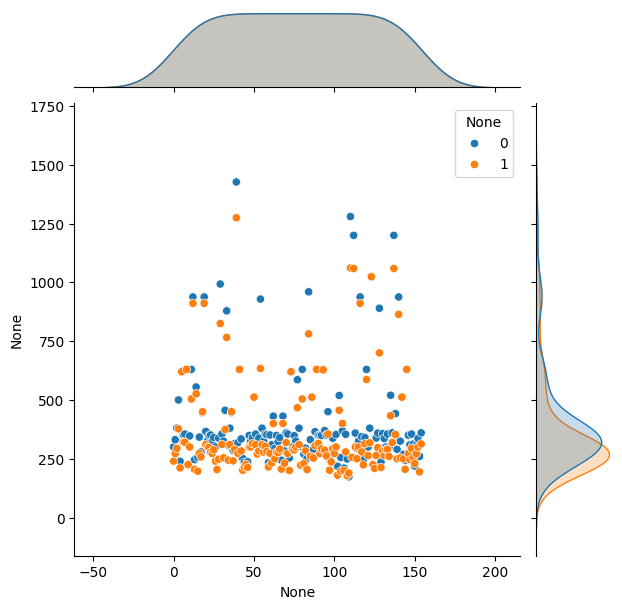

In [14]:
sns.jointplot([dim1, dim2])

In [15]:
print(np.mean(dim1))
print(np.mean(dim2))

413.7032258064516
361.23870967741937


In [16]:
image_shape = (224, 244, 3)
#Since we are going to use VGG 16

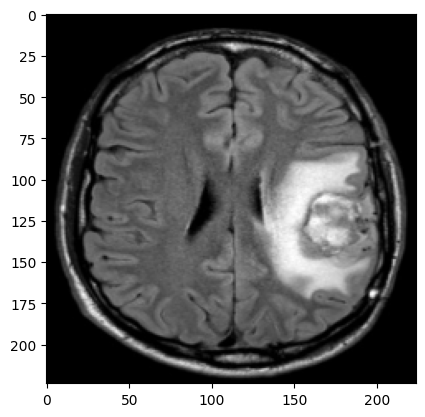

In [17]:
img = cv2.imread(path + "/yes" + "/Y20.jpg")
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [18]:
X = []
y = []

for image_filename in os.listdir(path + "/yes"):
  img = cv2.imread(path + "/yes/" + image_filename)
  img = cv2.resize(img, (224, 224))
  X.append(img)

for i in range(155):
    y.append(1)

for image_filename in os.listdir(path + "/no"):
  img = cv2.imread(path + "/no/" + image_filename)
  img = cv2.resize(img, (224, 224))
  X.append(img)

for i in range(98):
  y.append(0)

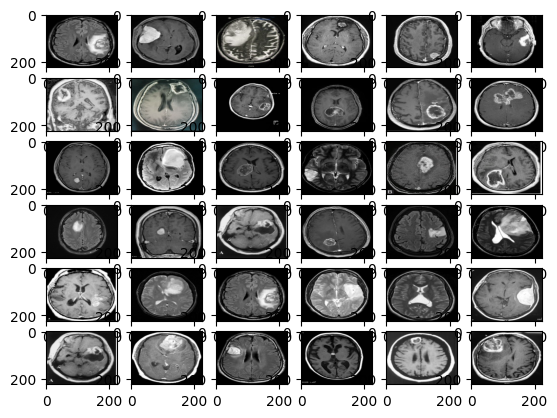

In [19]:
fig, ax = plt.subplots(6, 6)
k = 0

for i in range(6):
    for j in range(6):
        ax[i][j].imshow(X[k], aspect='auto')
        k += 1

plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
print(X_train[1].max())
print(X_train[1].min())

255
0


In [23]:
X_train = X_train / 255.
X_test = X_test / 255.

In [24]:
print(X_train[1].max())
print(X_train[1].min())

1.0
0.0


In [25]:
print("Shape of X_train: " , X_train.shape)
print("Shape of X_test: " , X_test.shape)
print("Shape of y_train: " , y_train.shape)
print("Shape of y_test: " , y_test.shape)

Shape of X_train:  (177, 224, 224, 3)
Shape of X_test:  (76, 224, 224, 3)
Shape of y_train:  (177,)
Shape of y_test:  (76,)


In [26]:
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), classes=2)

for layer in vgg_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [80]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 41062209 (156.64 MB)
Trainable params: 2

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [82]:
history = model.fit(X_train, y_train, epochs=9, validation_data=(X_test, y_test))

Epoch 1/9
6/6 [==============================] - 182s 32s/step - loss: 5.0105 - accuracy: 0.4350 - val_loss: 2.8116 - val_accuracy: 0.6579
Epoch 2/9
6/6 [==============================] - 181s 33s/step - loss: 1.9021 - accuracy: 0.4802 - val_loss: 0.7827 - val_accuracy: 0.6579
Epoch 3/9
6/6 [==============================] - 182s 32s/step - loss: 0.7380 - accuracy: 0.5989 - val_loss: 0.9047 - val_accuracy: 0.6711
Epoch 4/9
6/6 [==============================] - 143s 25s/step - loss: 0.8766 - accuracy: 0.6610 - val_loss: 0.3145 - val_accuracy: 0.8816
Epoch 5/9
6/6 [==============================] - 181s 33s/step - loss: 0.5088 - accuracy: 0.7910 - val_loss: 0.3965 - val_accuracy: 0.8553
Epoch 6/9
6/6 [==============================] - 181s 33s/step - loss: 0.4293 - accuracy: 0.8023 - val_loss: 0.3377 - val_accuracy: 0.8553
Epoch 7/9
6/6 [==============================] - 180s 33s/step - loss: 0.3278 - accuracy: 0.8644 - val_loss: 0.2594 - val_accuracy: 0.8684
Epoch 8/9
6/6 [============

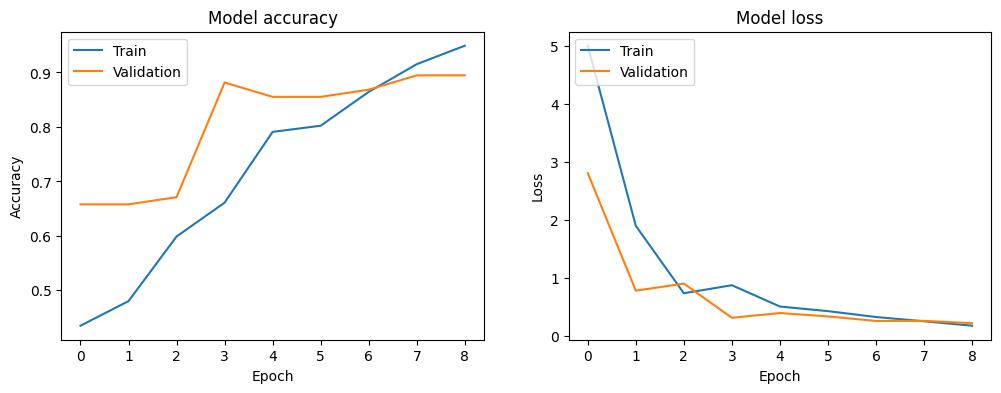

In [83]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [84]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

3/3 [==============================] - 42s 12s/step - loss: 0.2209 - accuracy: 0.8947
Validation Loss: 0.22094833850860596
Validation Accuracy: 0.8947368264198303


In [85]:
y_pred = model.predict(X_test)

3/3 [==============================] - 44s 13s/step


In [86]:
print(y_pred[:5])

[[0.994505  ]
 [0.9941083 ]
 [0.00909336]
 [0.5212801 ]
 [0.91706014]]


In [87]:
y_pred = y_pred >= 0.5

In [88]:
print(y_pred[:5])

[[ True]
 [ True]
 [False]
 [ True]
 [ True]]


In [89]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[19  7]
 [ 1 49]]


              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.88      0.98      0.92        50

    accuracy                           0.89        76
   macro avg       0.91      0.86      0.88        76
weighted avg       0.90      0.89      0.89        76



<Axes: >

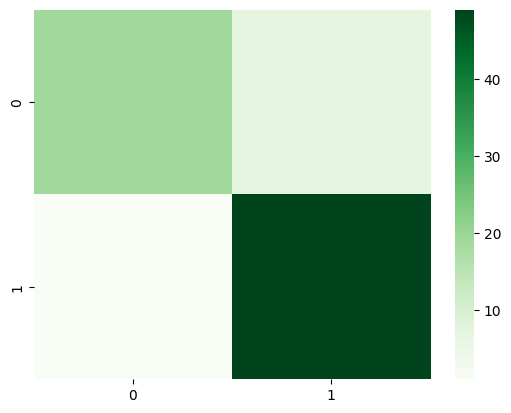

In [90]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Greens')

In [91]:
test_example = image.load_img(path + "/yes" + "/Y20.jpg", target_size=(224, 224, 3))

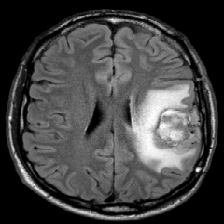

In [92]:
test_example

In [93]:
test_example = image.img_to_array(test_example)

In [94]:
test_example = np.expand_dims(test_example, axis=0)

In [95]:
pred = model.predict(test_example)

1/1 [==============================] - 1s 507ms/step


In [96]:
['tumor detected' if pred >= 0.5 else 'no tumor']

['tumor detected']

In [97]:
test_example = image.load_img(path + "/no" + "/11 no.jpg", target_size=(224, 224, 3))

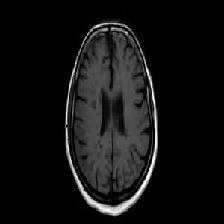

In [98]:
test_example

In [99]:
test_example = image.img_to_array(test_example)

In [100]:
test_example = np.expand_dims(test_example, axis=0)

In [101]:
pred = model.predict(test_example)

1/1 [==============================] - 0s 497ms/step


In [102]:
['tumor detected' if pred > 0.5 else 'no tumor']

['no tumor']